In [13]:
import pickle
from MARSModel import MARSModel

with open("model_1.pickle", "rb") as infile:
        err, model = pickle.load(infile)
        m1 = MARSModel()
        m1.components = model
        print(err)

with open("model_2.pickle", "rb") as infile:
        err, model = pickle.load(infile)
        m2 = MARSModel()
        m2.components = model
        print(err)

models = [m1, m2]


6.120441508710352
14.36462124915862


In [1]:
import sys
import string

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from MARS import runMARSForward, runMARSBackward

import logging
import pickle

from MARSModel import MARSModel
import statsmodels.api as sm

def gen_labels(n):
    alphabet_string = string.ascii_lowercase
    alphabet_list = list(alphabet_string)
    return alphabet_list[:n]

def computePrediction(X_test, model):
    y_pred = []
    for i in range(len(X_test)):
        obs = X_test[i]
        dic = {i: obs[i] for i in range(len(obs))}
        v = 0
        for c in model.components:
            hinge_values = {v: dic[v] for v in c.func.getVariables()}
            v += c.eval(hinge_values)
        y_pred.append(v)
    return y_pred

df = pd.read_json('dataset.json')
X = df['X'].to_numpy()
y = df['y'].to_numpy()
X = np.array(list(map(np.array, X)))
n = len(X[0])
X = X[:1000]
y = y[:1000]
labels = gen_labels(n)

rkf = KFold(n_splits=2, shuffle=True, random_state=2652124)
i = 0
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model, ssr = runMARSForward(X_train, y_train,labels, n, maxSplits=12)
    bmodel = runMARSBackward(model, ssr, X_train, y_train, n, maxSplits=12)

    err = mean_absolute_error(y_test, computePrediction(X_test, bmodel))
    i += 1


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


KeyboardInterrupt: 

In [ ]:
for c in models[0].components:
    print(c.func)

NameError: name 'models' is not defined

In [3]:
with open("model_2.pickle", "wb") as outfile:
    # "wb" argument opens the file in binary mode
    pickle.dump([models[1][0], models[1][1].components], outfile)

In [4]:
import sys
import string

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from MARS import runMARSForward, runMARSBackward

import logging
import pickle

from MARSModel import MARSModel

def gen_labels(n):
    alphabet_string = string.ascii_lowercase
    alphabet_list = list(alphabet_string)
    return alphabet_list[:n]

def computePrediction(X_test, model):
    y_pred = []
    for i in range(len(X_test)):
        obs = X_test[i]
        dic = {i: obs[i] for i in range(len(obs))}
        v = 0
        for c in model.components:
            hinge_values = {v: dic[v] for v in c.func.getVariables()}
            v += c.eval(hinge_values)
        y_pred.append(v)
    return y_pred

df = pd.read_json('ccpp.json')
X = df[['AT', 'V', 'AP', 'RH']].to_numpy()
y = df['PE'].to_numpy()
X = np.array(list(map(np.array, X)))
n = len(X[0])
X = X[:1000]
y = y[:1000]
labels = gen_labels(n)

rkf = KFold(n_splits=2, shuffle=True, random_state=2652124)
models = []
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model, ssr = runMARSForward(X_train, y_train, labels, n, maxSplits=14)
    bmodel = runMARSBackward(model, ssr, X_train, y_train, n, maxSplits=14)
    err = mean_absolute_error(y_test, computePrediction(X_test, bmodel))
    models.append((err, bmodel))

print(models)


0.2035406016548185
0.22970206468294646
0.4591528539210074
0.23067562504957378
0.2587787124141145
0.22849278709011014
0.23131664270205976
0.24858767460804226
0.22896347828183042
0.23172841804178326
0.22894298993817846
0.22859987327324147
0.23172682530211255
0.2596984086529194
0.5191127282914002
0.26079910436625425
0.2925721190184252
0.2615238312619346
0.2810502534905217
0.2588633716962979
0.2619893795389878
0.25884020781986655
0.25845228421983524
0.2619875788065545
0.29630155532821534
0.7028210968842683
0.2974019992209972
0.3335581648604201
0.2981867253541461
0.3210333030433656
0.2951704798229069
0.3060966858355166
0.2951468366224005
0.29868089573426354
0.34194407561034856
0.8471116445242975
0.34261677077810765
0.38404179811176375
0.343631682981545
0.36934360791573534
0.3397725985559818
0.3520671115466759
0.344187666092311
0.3979404893008657
1.0127182498202298
0.3985417001276137
0.4472117559874001
0.3997814719071115
0.4293380349931498
0.4092321404723836
0.4004400867322052
1.207700281806

0.06300682250743966
0.06703182224437709
0.06703182224437709
0.06718993841221345
0.06803254734640432
0.06703182224437709
0.06719606297741113
0.06798814618429995
0.06703182224437709
0.0670318222443771
0.06703551326791203
0.06783797800829078
0.06708806330603717
0.07179991115403755
0.07162374907232112
0.0725219611007104
0.0714551989441768
0.07163027779271086
0.07247462994119105
0.07145519894417682
0.07145519894417683
0.07145913353542267
0.07231455228654071
0.07151515130881791
0.07669954925134698
0.07651136583933912
0.07747087200866842
0.07651834008071397
0.07742031096280741
0.07633131382190429
0.07633131382190432
0.07633551691032316
0.07724930958189269
0.07639535734606215
0.08211837832412974
0.08191689973954319
0.08294419509377159
0.08192436671160933
0.08289006190611917
0.08174627618681528
0.08172862707012367
0.08270697926444827
0.08179269523726494
0.08813280055113469
0.08792610573523682
0.0890603139083042
0.08793409724718855
0.08897992239631294
0.09193748043518067
0.08876972541292512
0.08

In [9]:
with open("model_ccpp2.pickle", "wb") as outfile:
    # "wb" argument opens the file in binary mode
    pickle.dump([models[1][0], models[1][1].components], outfile)

6.120441508710352


TypeError: __str__ returned non-string (type float)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

df = pd.DataFrame()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = y

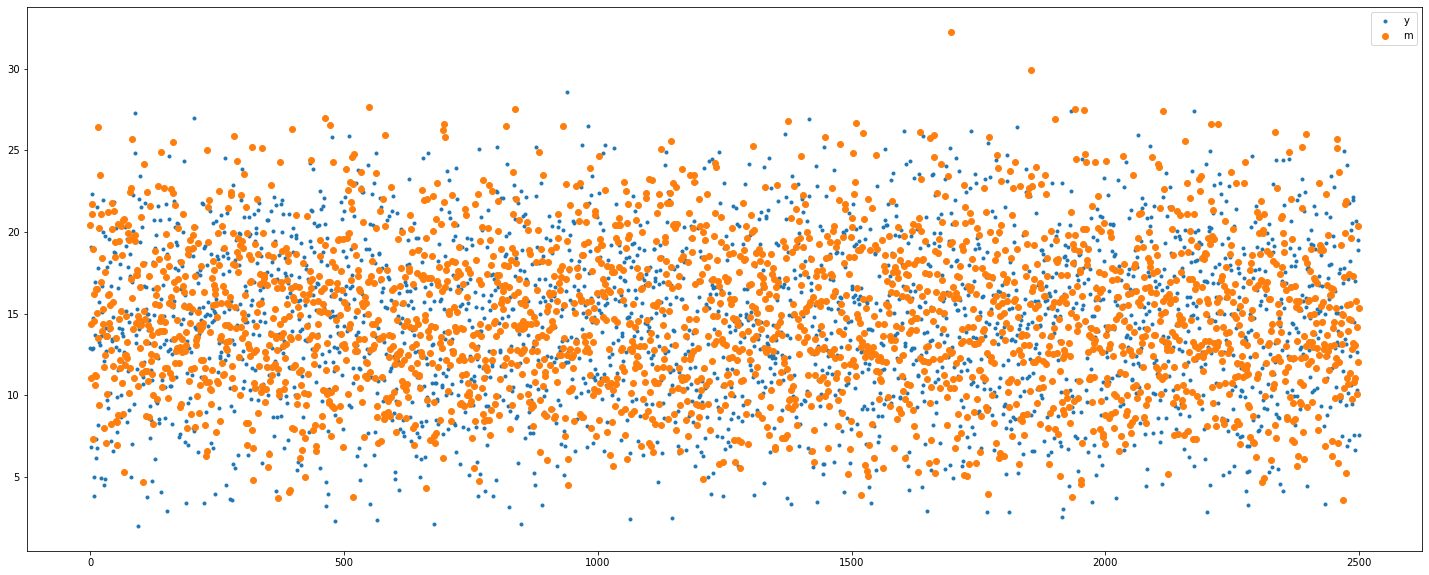

In [4]:
newmodelv = []
oldmodelv = []
for i in range(len(X)):
    obs = X[i]
    dic = {i: obs[i] for i in range(len(obs))}
    v = 0
    for c in newmodel.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        v += c.eval(hinge_values)
    newmodelv.append(v)
    d = 0
    for c in old.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        e = c.eval(hinge_values)
        d += e
    oldmodelv.append(d)

plt.figure(figsize=(25,10))
plt.plot(y, '.', label='y')
plt.plot(newmodelv, 'o', label='m')
plt.legend()

In [90]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, newmodelv)

4.486066308085652